<a href="https://colab.research.google.com/github/Dishant69/Web-Development/blob/main/DenoisingImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [ ]:

noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [ ]:

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

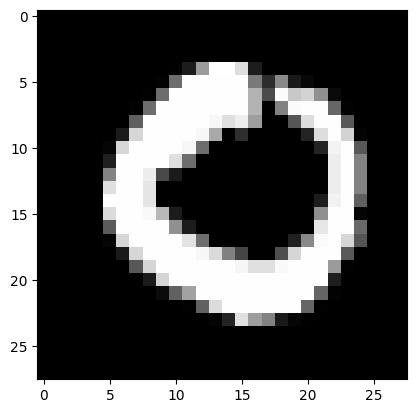

In [ ]:

index = np.random.randint(len(x_test))

plt.imshow(x_test[index].reshape(28,28))
plt.gray()

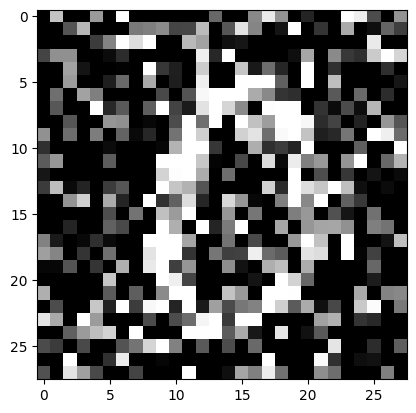

In [ ]:

index = np.random.randint(len(x_test))

plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

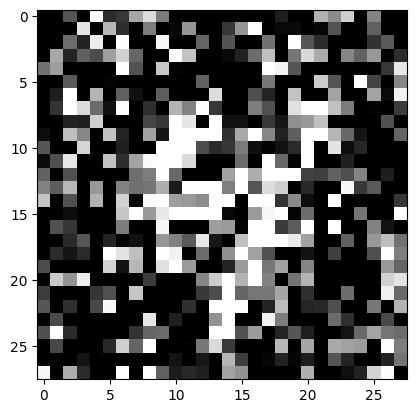

In [ ]:

index = np.random.randint(len(x_test))

plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

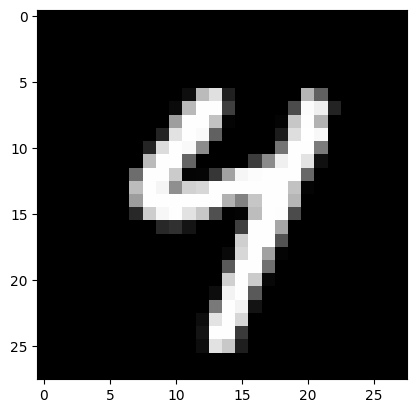

In [ ]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

In [ ]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)        0

In [ ]:

model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 9s 12ms/step - loss: 0.2499 - val_loss: 0.1541
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1443 - val_loss: 0.1389
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1343 - val_loss: 0.1301
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1295 - val_loss: 0.1262
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1266 - val_loss: 0.1242
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1244 - val_loss: 0.1221
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1227 - val_loss: 0.1208
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1215 - val_loss: 0.1198
Epoch 9/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1205 - val_loss: 0.1189
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1196 - val_loss: 0

## Visualize the Results

In [ ]:

pred = model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


In [ ]:
psnr_values = []
ssim_values = []

for i in range(len(x_test)):
    original = x_test[i].reshape(28, 28)
    reconstructed = pred[i].reshape(28, 28)
    psnr_values.append(psnr(original, reconstructed))
    ssim_values.append(ssim(original, reconstructed, data_range=reconstructed.max() - reconstructed.min()))

average_psnr = np.mean(psnr_values)
average_ssim = np.mean(ssim_values)

print(f'Average PSNR: {average_psnr}')
print(f'Average SSIM: {average_ssim}')

Average PSNR: 18.166630456909665
Average SSIM: 0.7950335861927382


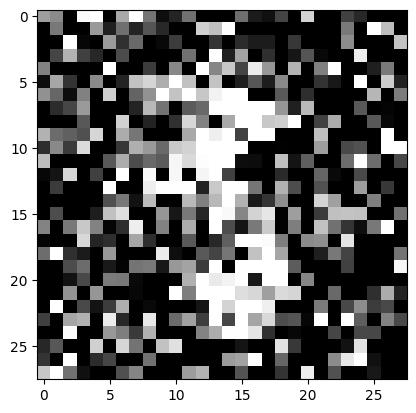

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

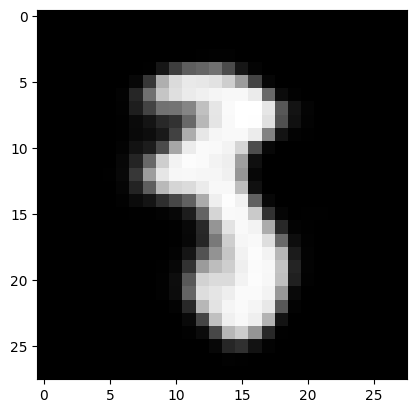

In [ ]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

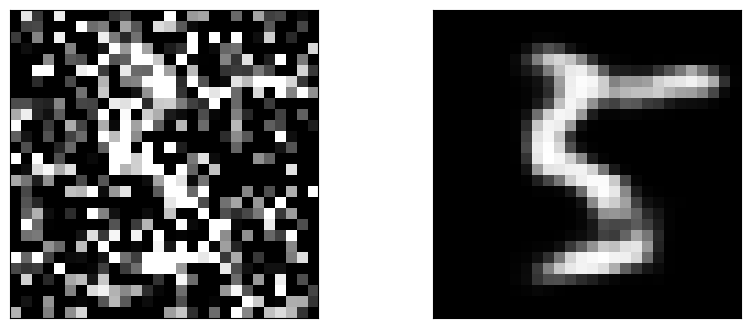

In [ ]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

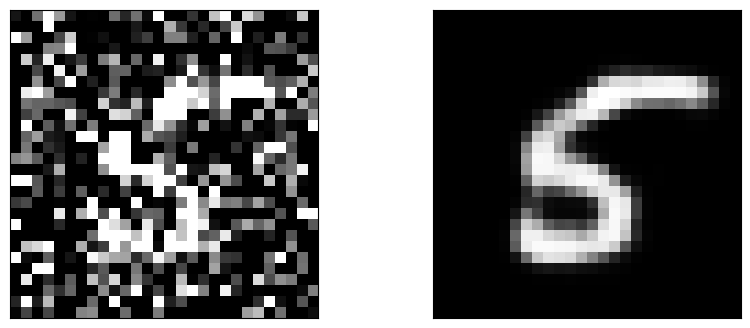

In [ ]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()